# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [5]:
%pip install --upgrade plotly

## Import Statements

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

## Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [8]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
print("Shape of df_hh_income:", df_hh_income.shape)
print("Number of rows:", df_hh_income.shape[0])
print("Number of columns:", df_hh_income.shape[1])
print("Column names:", df_hh_income.columns.tolist())
print("NaN values in df_hh_income:\n", df_hh_income.isnull().sum())
print("Duplicate rows in df_hh_income:", df_hh_income.duplicated().sum())

Shape of df_hh_income: (29322, 3)
Number of rows: 29322
Number of columns: 3
Column names: ['Geographic Area', 'City', 'Median Income']
NaN values in df_hh_income:
 Geographic Area     0
City                0
Median Income      51
dtype: int64
Duplicate rows in df_hh_income: 0


In [17]:
print("Shape of df_pct_poverty:", df_pct_poverty.shape)
print("Number of rows:", df_pct_poverty.shape[0])
print("Number of columns:", df_pct_poverty.shape[1])
print("Column names:", df_pct_poverty.columns.tolist())
print("NaN values in df_pct_poverty:\n", df_pct_poverty.isnull().sum())
print("Duplicate rows in df_pct_poverty:", df_pct_poverty.duplicated().sum())


Shape of df_pct_poverty: (29329, 3)
Number of rows: 29329
Number of columns: 3
Column names: ['Geographic Area', 'City', 'poverty_rate']
NaN values in df_pct_poverty:
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Duplicate rows in df_pct_poverty: 0


In [16]:

print("Shape of df_pct_completed_hs:", df_pct_completed_hs.shape)
print("Number of rows:", df_pct_completed_hs.shape[0])
print("Number of columns:", df_pct_completed_hs.shape[1])
print("Column names:", df_pct_completed_hs.columns.tolist())
print("NaN values in df_pct_completed_hs:\n", df_pct_completed_hs.isnull().sum())
print("Duplicate rows in df_pct_completed_hs:", df_pct_completed_hs.duplicated().sum())


Shape of df_pct_completed_hs: (29329, 3)
Number of rows: 29329
Number of columns: 3
Column names: ['Geographic Area', 'City', 'percent_completed_hs']
NaN values in df_pct_completed_hs:
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Duplicate rows in df_pct_completed_hs: 0


In [15]:

print("Shape of df_share_race_city:", df_share_race_city.shape)
print("Number of rows:", df_share_race_city.shape[0])
print("Number of columns:", df_share_race_city.shape[1])
print("Column names:", df_share_race_city.columns.tolist())
print("NaN values in df_share_race_city:\n", df_share_race_city.isnull().sum())
print("Duplicate rows in df_share_race_city:", df_share_race_city.duplicated().sum())


Shape of df_share_race_city: (29268, 7)
Number of rows: 29268
Number of columns: 7
Column names: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
NaN values in df_share_race_city:
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
Duplicate rows in df_share_race_city: 0


In [14]:

print("Shape of df_fatalities:", df_fatalities.shape)
print("Number of rows:", df_fatalities.shape[0])
print("Number of columns:", df_fatalities.shape[1])
print("Column names:", df_fatalities.columns.tolist())
print("NaN values in df_fatalities:\n", df_fatalities.isnull().sum())
print("Duplicate rows in df_fatalities:", df_fatalities.duplicated().sum())

Shape of df_fatalities: (2535, 14)
Number of rows: 2535
Number of columns: 14
Column names: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
NaN values in df_fatalities:
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64
Duplicate rows in df_fatalities: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [21]:
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)


In [22]:
df_hh_income.drop_duplicates(inplace=True)
df_pct_poverty.drop_duplicates(inplace=True)
df_pct_completed_hs.drop_duplicates(inplace=True)
df_share_race_city.drop_duplicates(inplace=True)
df_fatalities.drop_duplicates(inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

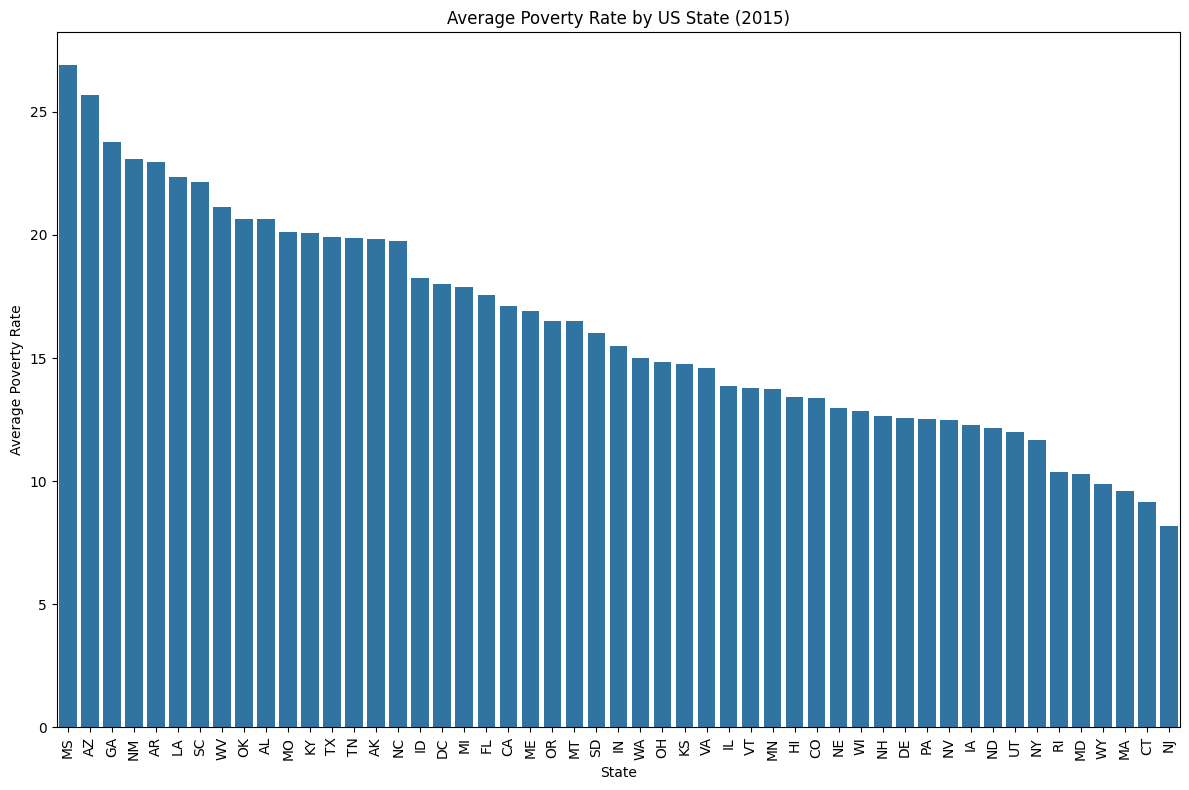

State with the highest poverty rate: MS
State with the lowest poverty rate: NJ


In [24]:

df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty.dropna(subset=['poverty_rate'], inplace=True)

state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=state_poverty.index, y=state_poverty.values)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Average Poverty Rate")
plt.title("Average Poverty Rate by US State (2015)")
plt.tight_layout()
plt.show()

highest_poverty_state = state_poverty.index[0]
lowest_poverty_state = state_poverty.index[-1]

print(f"State with the highest poverty rate: {highest_poverty_state}")
print(f"State with the lowest poverty rate: {lowest_poverty_state}")

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

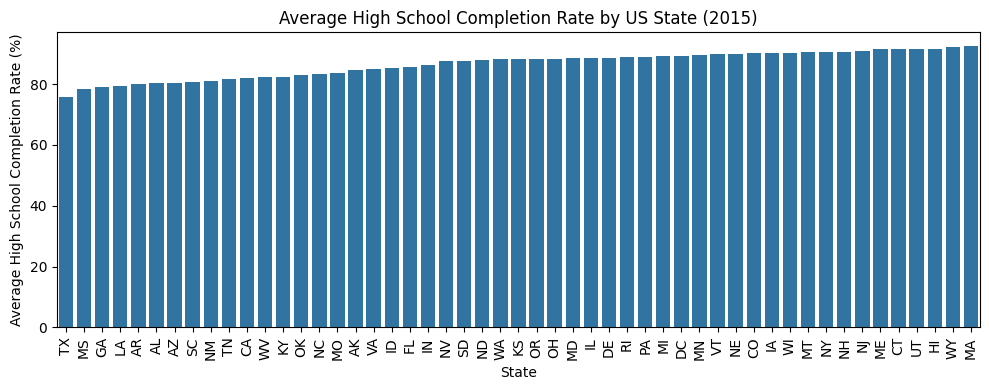

State with the lowest high school graduation rate: TX
State with the highest high school graduation rate: MA


In [28]:

df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_pct_completed_hs.dropna(subset=['percent_completed_hs'], inplace=True)

state_hs_completion = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values(ascending=True)

plt.figure(figsize=(10,4))
sns.barplot(x=state_hs_completion.index, y=state_hs_completion.values)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Average High School Completion Rate (%)")
plt.title("Average High School Completion Rate by US State (2015)")
plt.tight_layout()
plt.show()

lowest_hs_completion_state = state_hs_completion.index[0]
highest_hs_completion_state = state_hs_completion.index[-1]

print(f"State with the lowest high school graduation rate: {lowest_hs_completion_state}")
print(f"State with the highest high school graduation rate: {highest_hs_completion_state}")

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

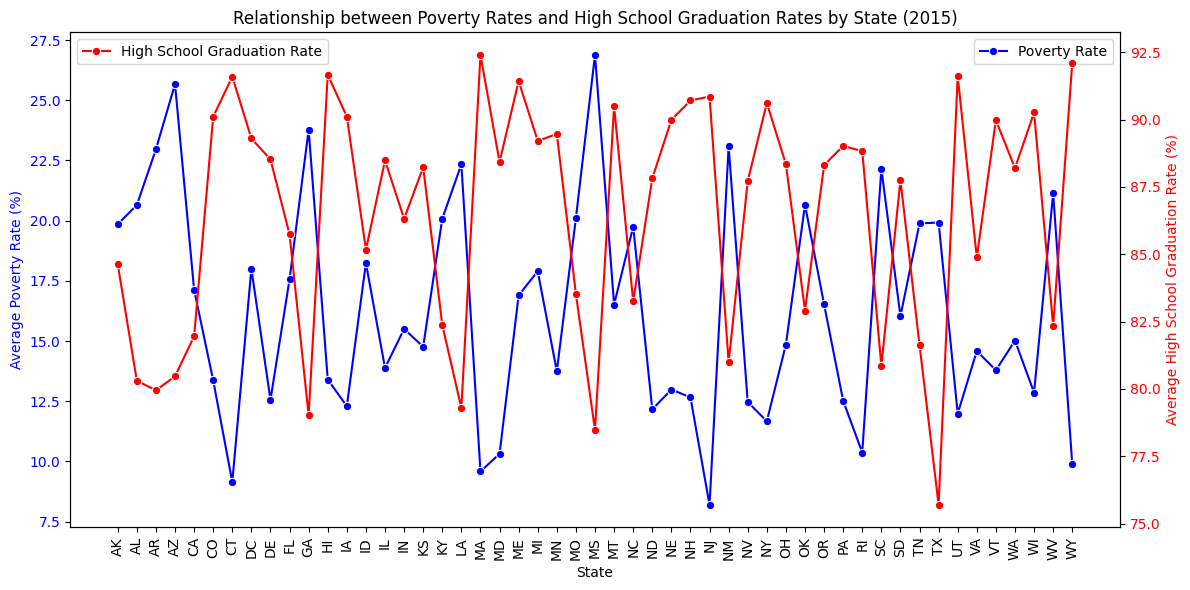

In [29]:

poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
hs_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()

combined_data = pd.DataFrame({
  'Poverty Rate': poverty_by_state,
  'High School Graduation Rate': hs_by_state
}).dropna()

plt.figure(figsize=(12, 6))

ax1 = sns.lineplot(x=combined_data.index, y=combined_data['Poverty Rate'], label='Poverty Rate', marker='o', color='blue')
ax1.set_xlabel("State")
ax1.set_ylabel("Average Poverty Rate (%)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()
sns.lineplot(x=combined_data.index, y=combined_data['High School Graduation Rate'], label='High School Graduation Rate', marker='o', color='red', ax=ax2)
ax2.set_ylabel("Average High School Graduation Rate (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Relationship between Poverty Rates and High School Graduation Rates by State (2015)")
plt.tight_layout()
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

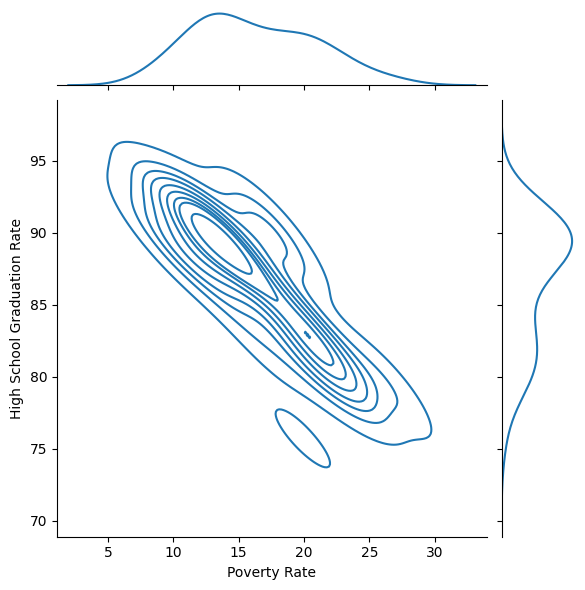

In [31]:

sns.jointplot(x='Poverty Rate', y='High School Graduation Rate', data=combined_data, kind='kde')
plt.show()

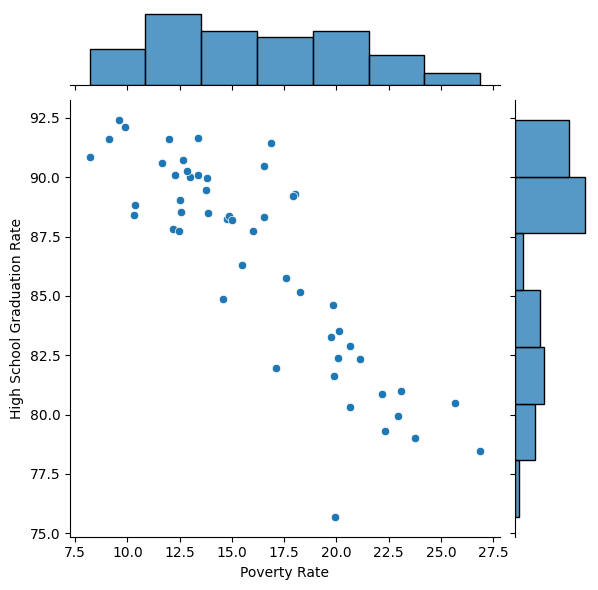

In [32]:
sns.jointplot(x='Poverty Rate', y='High School Graduation Rate', data=combined_data, kind='scatter')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

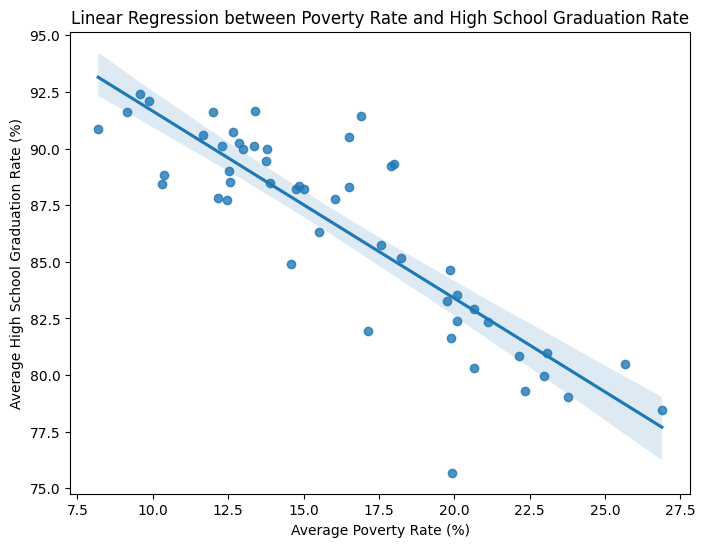

In [34]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Poverty Rate', y='High School Graduation Rate', data=combined_data)
plt.title("Linear Regression between Poverty Rate and High School Graduation Rate")
plt.xlabel("Average Poverty Rate (%)")
plt.ylabel("Average High School Graduation Rate (%)")
plt.show()

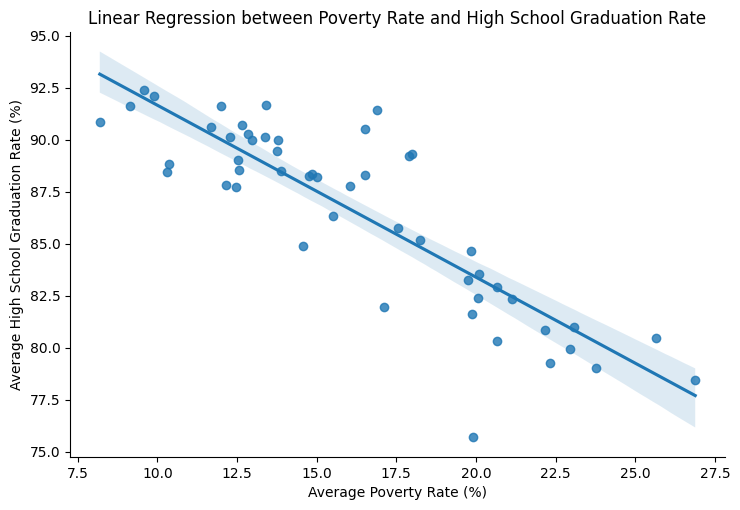

In [35]:
sns.lmplot(x='Poverty Rate', y='High School Graduation Rate', data=combined_data, aspect=1.5)
plt.title("Linear Regression between Poverty Rate and High School Graduation Rate")
plt.xlabel("Average Poverty Rate (%)")
plt.ylabel("Average High School Graduation Rate (%)")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

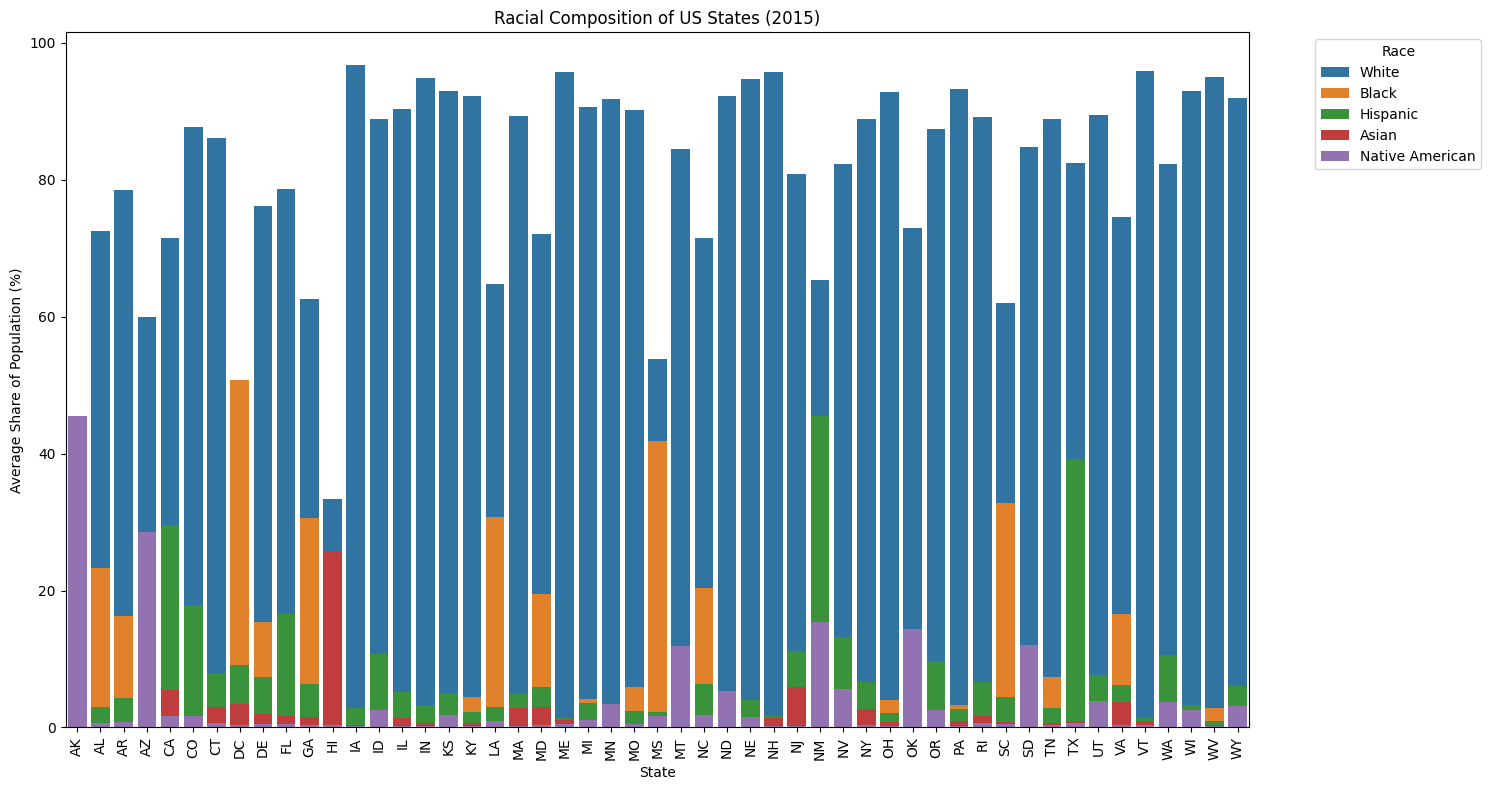

In [41]:

df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce').fillna(0)
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce').fillna(0)
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce').fillna(0)
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce').fillna(0)
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce').fillna(0)

state_race_share = df_share_race_city.groupby('Geographic area')[[
    'share_white',
    'share_black',
    'share_hispanic',
    'share_asian',
    'share_native_american'
]].mean()

state_race_share_melted = state_race_share.reset_index().melt(
    id_vars='Geographic area',
    var_name='Race',
    value_name='Share'
)

state_race_share_melted['Race'] = state_race_share_melted['Race'].replace({
    'share_white': 'White',
    'share_black': 'Black',
    'share_hispanic': 'Hispanic',
    'share_asian': 'Asian',
    'share_native_american': 'Native American'
})

plt.figure(figsize=(15, 8))
sns.barplot(data=state_race_share_melted, x='Geographic area', y='Share', hue='Race', dodge=False)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Average Share of Population (%)")
plt.title("Racial Composition of US States (2015)")
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [42]:
race_counts = df_fatalities['race'].value_counts()

fig = px.pie(
    names=race_counts.index,
    values=race_counts.values,
    title='Distribution of People Killed by Police by Race',
    hole=0.4
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

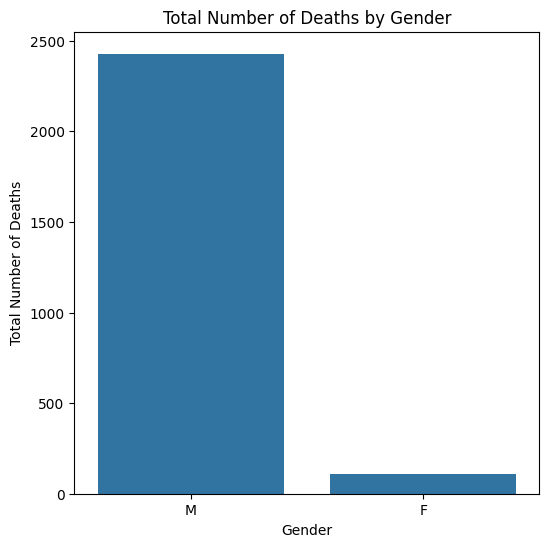

In [43]:
gender_counts = df_fatalities['gender'].value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Total Number of Deaths")
plt.title("Total Number of Deaths by Gender")
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

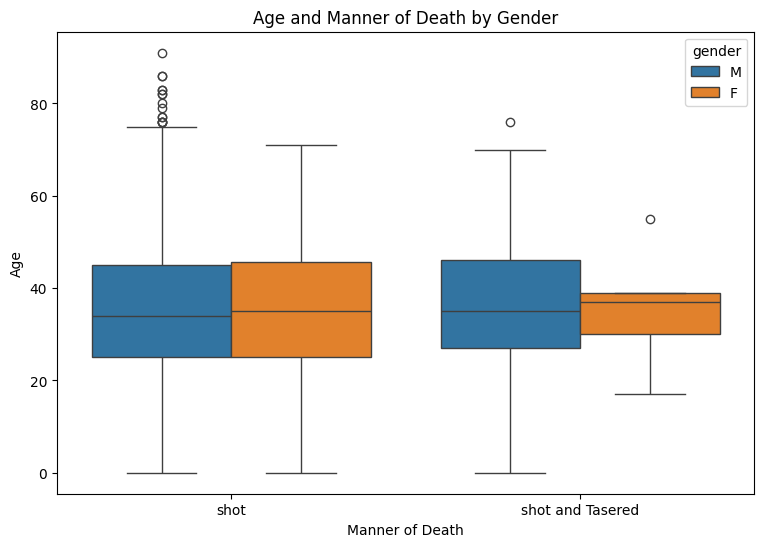

In [46]:

plt.figure(figsize=(9, 6))
sns.boxplot(data=df_fatalities, x='manner_of_death', y='age', hue='gender')
plt.title('Age and Manner of Death by Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [47]:

armed_counts = df_fatalities['armed'].value_counts()
total_fatalities = armed_counts.sum()

armed_sum = total_fatalities - armed_counts.get('unarmed', 0) - armed_counts.get('not-armed', 0)
percentage_armed = (armed_sum / total_fatalities) * 100

print(f"Percentage of police killings where people were armed: {percentage_armed:.2f}%")


Percentage of police killings where people were armed: 93.25%


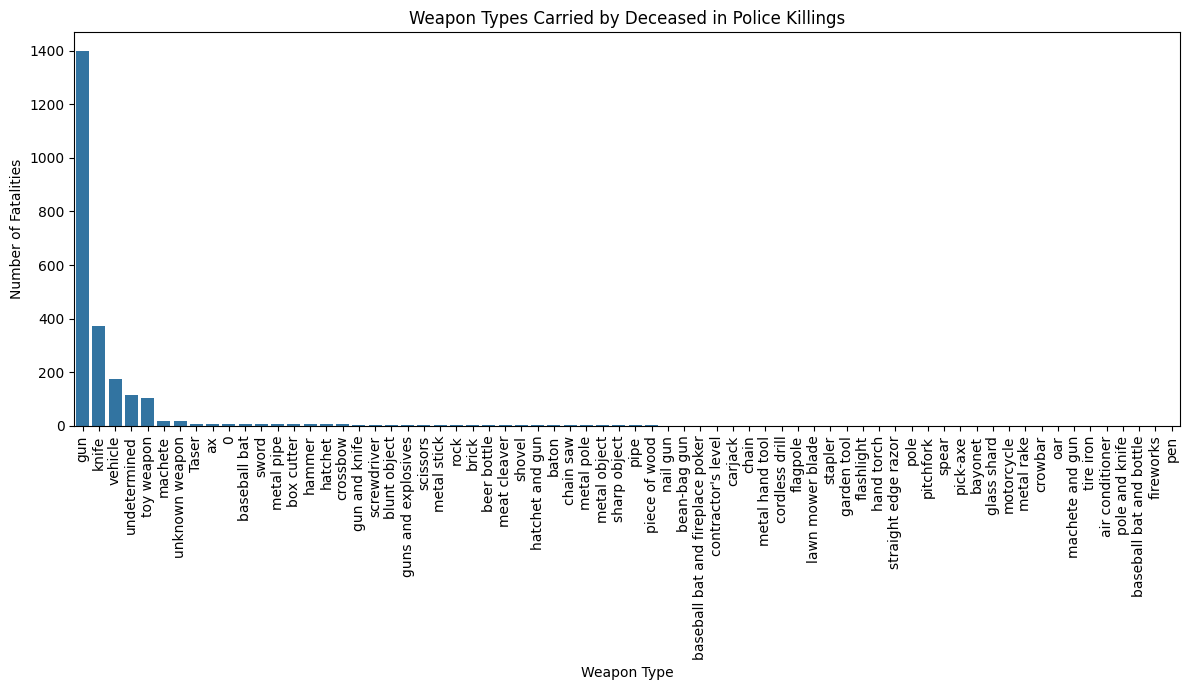

In [48]:
weapon_counts = df_fatalities[~df_fatalities['armed'].isin(['unarmed', 'not-armed', '0'])]['armed'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=weapon_counts.index, y=weapon_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Weapon Type")
plt.ylabel("Number of Fatalities")
plt.title("Weapon Types Carried by Deceased in Police Killings")
plt.tight_layout()
plt.show()


In [49]:
gun_armed_counts = df_fatalities[df_fatalities['armed'] == 'gun'].shape[0]
unarmed_counts = df_fatalities[df_fatalities['armed'].isin(['unarmed', 'not-armed'])].shape[0]

print(f"Number of people killed by police who were armed with guns: {gun_armed_counts}")
print(f"Number of people killed by police who were unarmed: {unarmed_counts}")

Number of people killed by police who were armed with guns: 1398
Number of people killed by police who were unarmed: 171


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [50]:
under_25_fatalities = df_fatalities[df_fatalities['age'] < 25].shape[0]
total_fatalities = df_fatalities.shape[0]

percentage_under_25 = (under_25_fatalities / total_fatalities) * 100

print(f"Percentage of people killed who were under 25 years old: {percentage_under_25:.2f}%")

Percentage of people killed who were under 25 years old: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

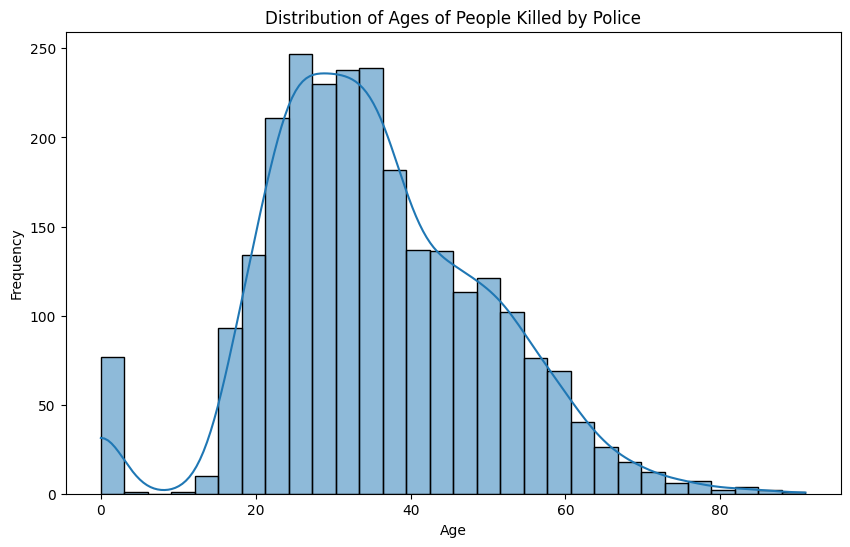

In [51]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df_fatalities, x='age', bins=30, kde=True)
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions?

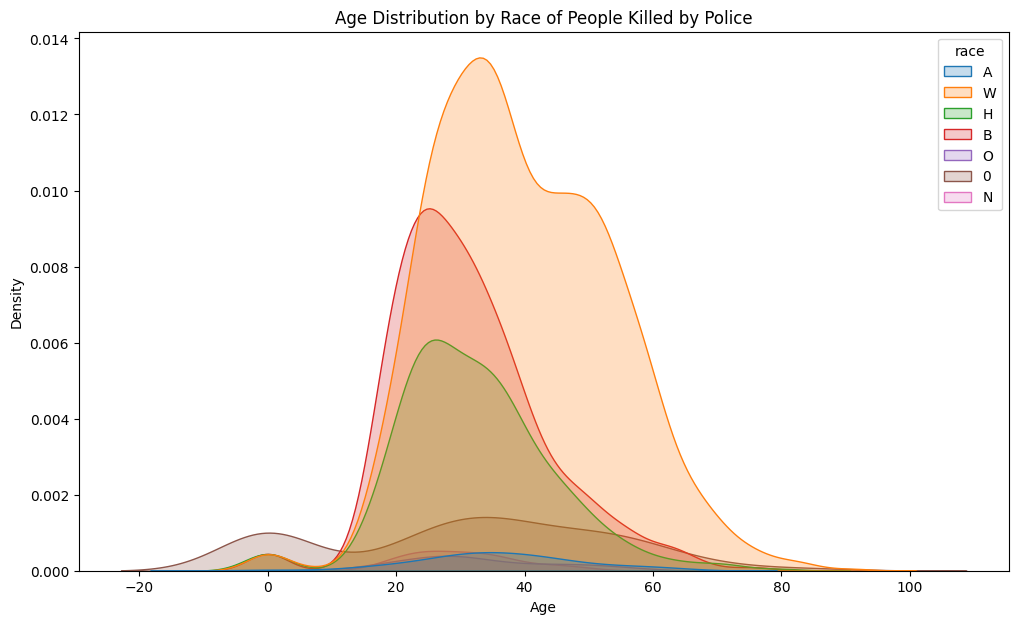

In [52]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_fatalities, x='age', hue='race', fill=True)
plt.title('Age Distribution by Race of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

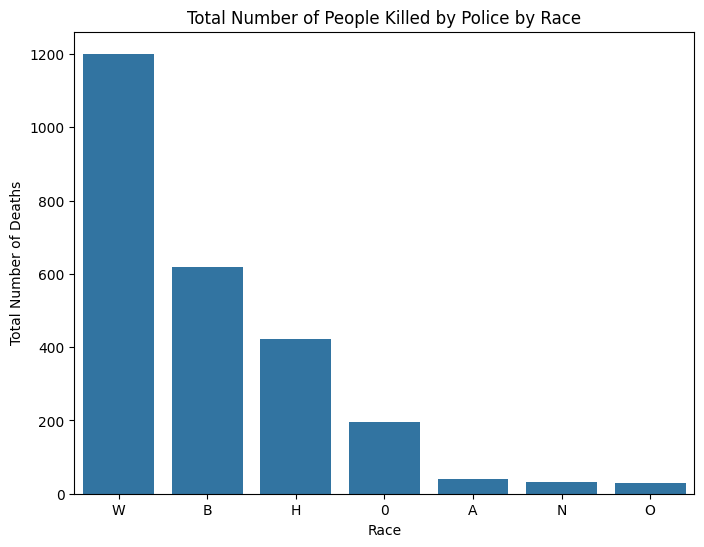

In [53]:

race_counts = df_fatalities['race'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.xlabel("Race")
plt.ylabel("Total Number of Deaths")
plt.title("Total Number of People Killed by Police by Race")
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [54]:

mental_illness_counts = df_fatalities['signs_of_mental_illness'].value_counts()

total_fatalities = df_fatalities.shape[0]
mental_illness_yes_count = mental_illness_counts.get(True, 0)

percentage_mental_illness = (mental_illness_yes_count / total_fatalities) * 100

print(f"Percentage of people killed by police who had signs of mental illness: {percentage_mental_illness:.2f}%")

Percentage of people killed by police who had signs of mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

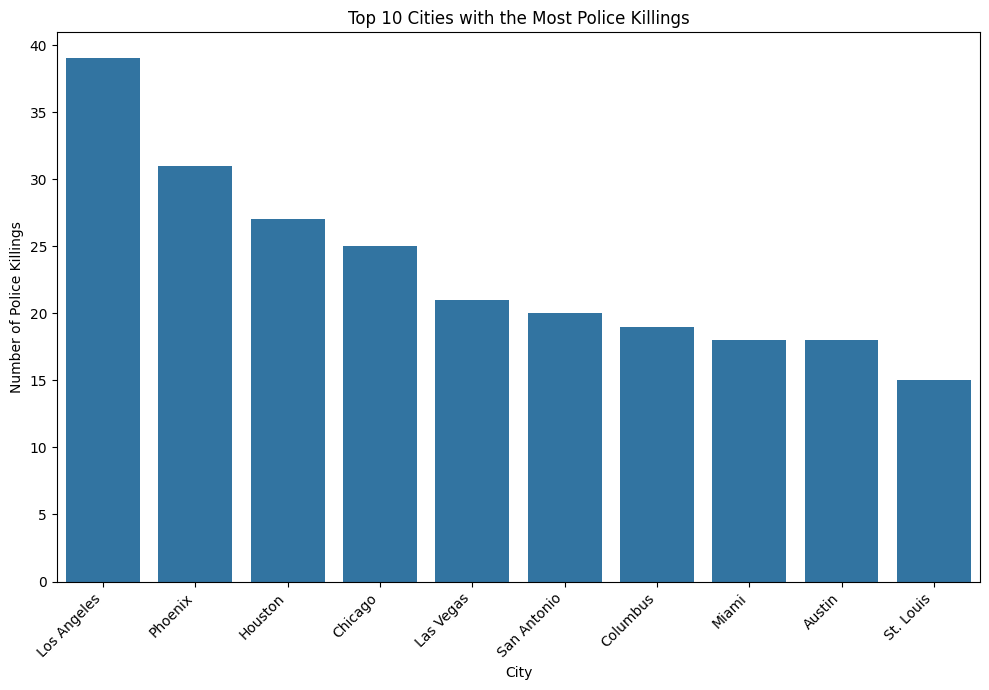

Top 10 cities with the most police killings:


,count
city,
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Miami,18
Austin,18


In [55]:
city_counts = df_fatalities['city'].value_counts().head(10)

plt.figure(figsize=(10, 7))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("City")
plt.ylabel("Number of Police Killings")
plt.title("Top 10 Cities with the Most Police Killings")
plt.tight_layout()
plt.show()

print("Top 10 cities with the most police killings:")
city_counts

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [60]:

police_killings_by_state = df_fatalities.groupby('state').size().reset_index(name='number_of_killings')

fig = px.choropleth(
    police_killings_by_state,
    locations='state',
    locationmode='USA-states',
    color='number_of_killings',
    scope='usa',
    color_continuous_scale="Viridis",
    title='Number of Police Killings by US State (2015-present)'
)
fig.show()
print("States with the highest number of police killings:")
print(police_killings_by_state.sort_values(by='number_of_killings', ascending=False).head())

States with the highest number of police killings:
   state  number_of_killings
4     CA                 424
43    TX                 225
9     FL                 154
3     AZ                 118
35    OH                  79


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

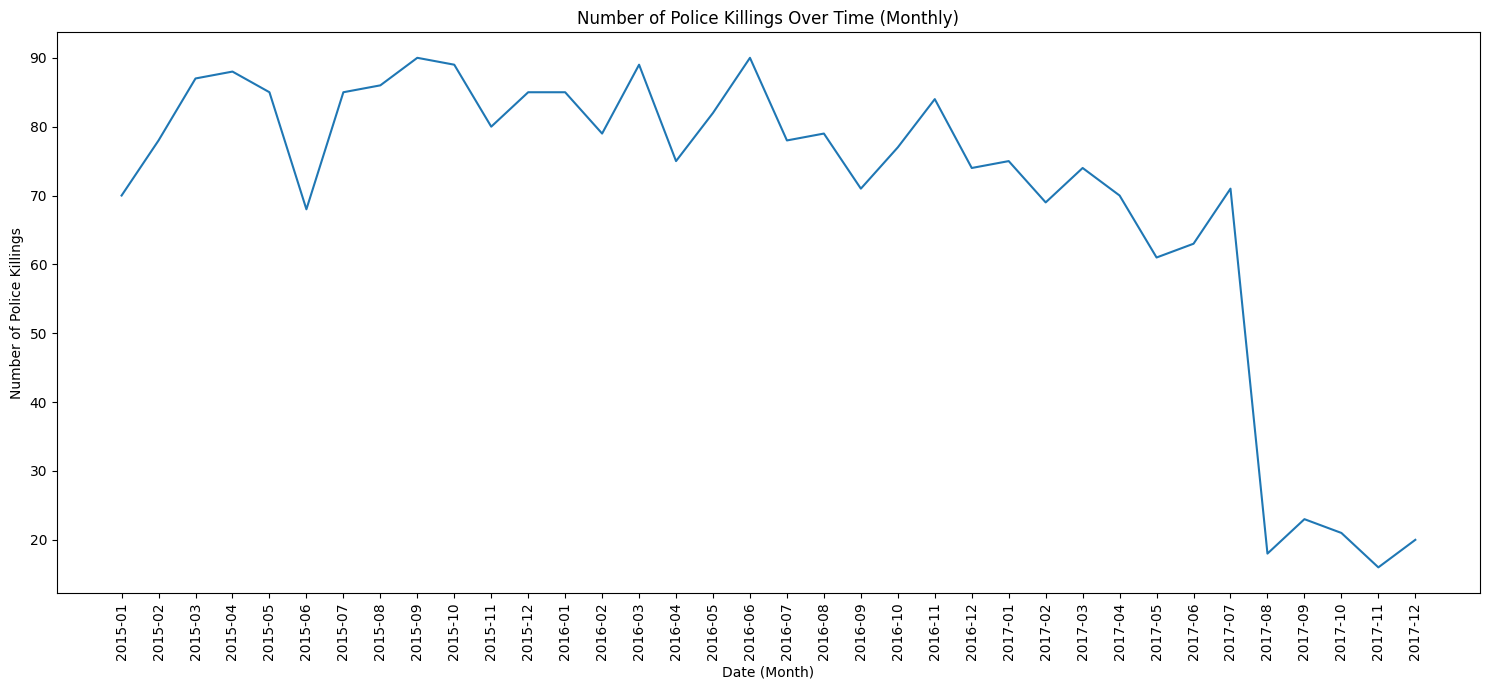

In [62]:

df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
fatalities_over_time = df_fatalities.groupby(df_fatalities['date'].dt.to_period('M')).size().reset_index(name='number_of_killings')
fatalities_over_time['date'] = fatalities_over_time['date'].astype(str)

plt.figure(figsize=(15, 7))
sns.lineplot(data=fatalities_over_time, x='date', y='number_of_killings')
plt.xticks(rotation=90)
plt.xlabel("Date (Month)")
plt.ylabel("Number of Police Killings")
plt.title("Number of Police Killings Over Time (Monthly)")
plt.tight_layout()
plt.show()


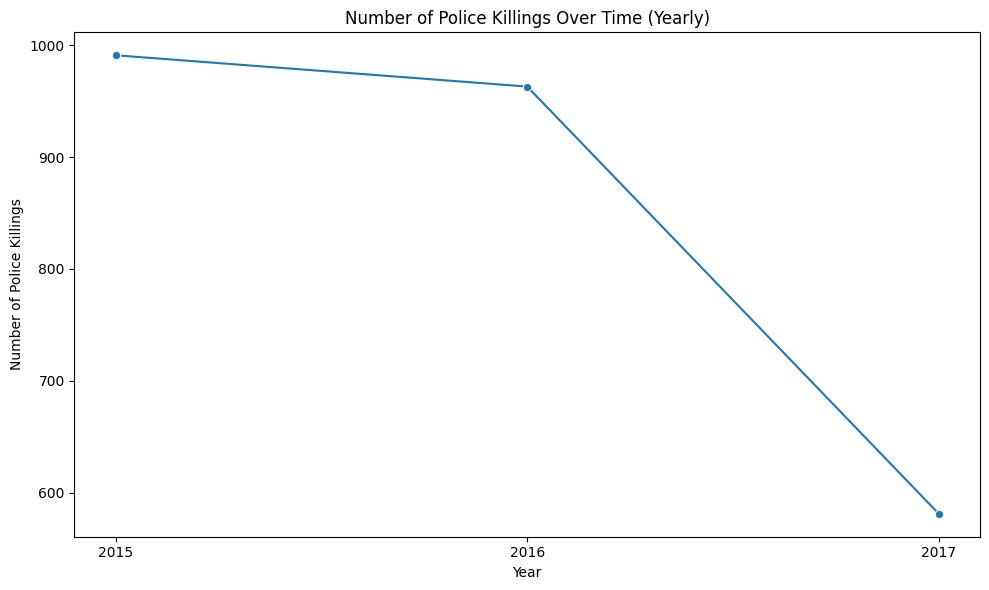

In [63]:

fatalities_over_time_yearly = df_fatalities.groupby(df_fatalities['date'].dt.to_period('Y')).size().reset_index(name='number_of_killings')
fatalities_over_time_yearly['date'] = fatalities_over_time_yearly['date'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=fatalities_over_time_yearly, x='date', y='number_of_killings', marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Police Killings")
plt.title("Number of Police Killings Over Time (Yearly)")
plt.tight_layout()
plt.show()




In [64]:
print("Monthly fatality counts:")
print(fatalities_over_time.head())
print("\nYearly fatality counts:")
fatalities_over_time_yearly

Monthly fatality counts:
      date  number_of_killings
0  2015-01                  70
1  2015-02                  78
2  2015-03                  87
3  2015-04                  88
4  2015-05                  85

Yearly fatality counts:


,date,number_of_killings
0,2015,991
1,2016,963
2,2017,581


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).